# Full visualization of the compute graph
In this example, the full compute graph is visualized, including :
- detailed information about the backward function (white or red)
- saved tensors of each backward function (orange)
- trainable parameters (light blue)

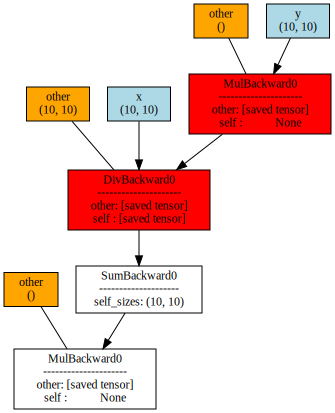

In [9]:
import torch 
from compute_graph import ComputeGraph

x = torch.randn(10, 10, requires_grad=True)
y = torch.randn(10, 10, requires_grad=True)
compute_graph = ComputeGraph({'x': x, 'y': y})

z = x / (y * 0)
z = z.sum() * 2

compute_graph.register_hooks(z)
compute_graph.add_saved_tensors(z)
compute_graph.add_backward_fn_attrs(z)

z.backward()
dot = compute_graph.get_dot(z)
compute_graph.clear()
dot


In this example, the saved tensors are ommited for clarity.

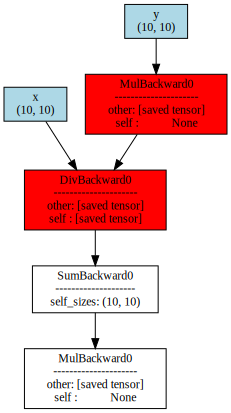

In [10]:
x = torch.randn(10, 10, requires_grad=True)
y = torch.randn(10, 10, requires_grad=True)
compute_graph = ComputeGraph({'x': x, 'y': y})

z = x / (y * 0)
z = z.sum() * 2

compute_graph.register_hooks(z)
# compute_graph.add_saved_tensors(z)
compute_graph.add_backward_fn_attrs(z)

z.backward()
dot = compute_graph.get_dot(z)
compute_graph.clear()
dot

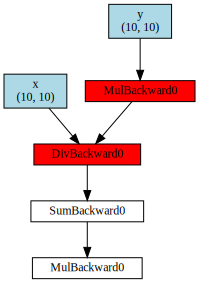

In [11]:
x = torch.randn(10, 10, requires_grad=True)
y = torch.randn(10, 10, requires_grad=True)
compute_graph = ComputeGraph({'x': x, 'y': y})

z = x / (y * 0)
z = z.sum() * 2

compute_graph.register_hooks(z)
# compute_graph.add_saved_tensors(z)
# compute_graph.add_backward_fn_attrs(z)

z.backward()
dot = compute_graph.get_dot(z)
compute_graph.clear()
dot

In the above examples, `z = x / (y * 0)` is a division by zero, which is not differentiable. Therefore, the backward function is shown in red, which indicates a infinite or NaN gradient.

We change the code to `z = x / (y * 1)` to get a valid backward function.


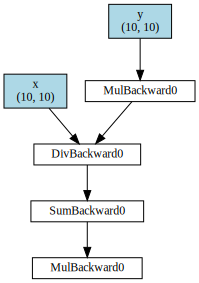

In [12]:
x = torch.randn(10, 10, requires_grad=True)
y = torch.randn(10, 10, requires_grad=True)
compute_graph = ComputeGraph({'x': x, 'y': y})

z = x / (y * 1)
z = z.sum() * 2

compute_graph.register_hooks(z)
# compute_graph.add_saved_tensors(z)
# compute_graph.add_backward_fn_attrs(z)

z.backward()
dot = compute_graph.get_dot(z)
compute_graph.clear()
dot

A more complex example is shown below.


/home/tdt/anaconda3/envs/neus/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  warnings.warn(
/home/tdt/anaconda3/envs/neus/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


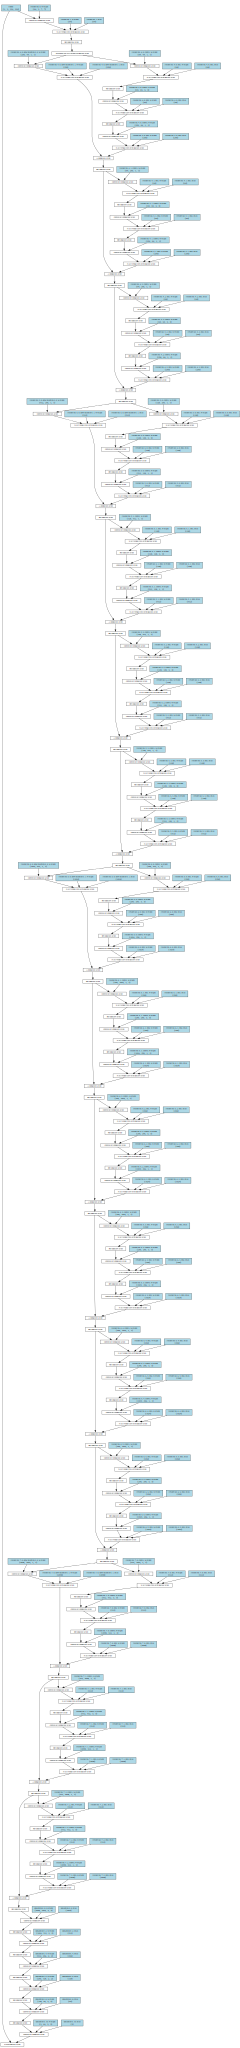

In [17]:
from encoder import ResNet50Autoencoder
import torch.nn as nn

encoder = ResNet50Autoencoder()
# Loss function
criterion = nn.L1Loss()

B, C, H, W = 1, 3, 224, 224
x = torch.randn(B, C, H, W, requires_grad=True)

compute_graph = ComputeGraph({
    'input': x,
    **dict(encoder.named_parameters()),
})

y = encoder(x)
loss = criterion(x, y)

compute_graph.register_hooks(loss)
# compute_graph.add_backward_fn_attrs(loss)
# compute_graph.add_backward_fn_attrs(loss)
loss.backward()

dot = compute_graph.get_dot(loss)
compute_graph.clear()
dot
